## Welcome to the MedCare Wellness Research Center!
Our primary objective is to better understand the health and well-being of the senior population across diverse communities. the dataset used contains records of thousands of elderly individuals, detailing an array of health indicators and lifestyle factors. Our mission? To anticipate and predict health issues and concerns in our aging population, enhancing their life quality. Lets' journey through this data-driven exploration to enrich the lives of our senior community!

In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA)
The initial step of our analysis is known as Exploratory Data Analysis (EDA) which is useful in order to gain a deeper understanding of our dataset. EDA holds a central position in the data analysis for understanding the data structure and meaning, detecting outliers, identifying patterns through plots and visualizations, data cleaning and integrity, and, mostly, to construct a solid foundation for what we will do next. It helps us in order to reduce the risk of mistakes and enabling more accurate predictions and insights!


In [2]:
# Read data
path = 'data/medcenter.csv'
medcenter_df = pd.read_csv(path)

In [3]:
# More to know about the medcare dataset

print("Relevant information of the dataset:"), (medcenter_df.info())
print("\nShape of the medcenter dataset:", medcenter_df.shape)

# Understanding columns meanings
medcenter_df.sample(10)


Relevant information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261311 entries, 0 to 261310
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Walking Difficulty        261311 non-null  object 
 1   Torsades de Pointes       261311 non-null  object 
 2   Skin Cancer               261311 non-null  object 
 3   Hours of sleep            261311 non-null  float64
 4   How do you Feel           261311 non-null  object 
 5   Asthma Status             261311 non-null  object 
 6   Do you Exercise           261311 non-null  object 
 7   Gender                    261311 non-null  object 
 8   Kidney Disease            261311 non-null  object 
 9   Is Smoking                261311 non-null  object 
 10  Ethnicity                 261311 non-null  object 
 11  Diabetes                  261311 non-null  object 
 12  How many Drinks per Week  261311 non-null  object 
 13  Age Gro

,Walking Difficulty,Torsades de Pointes,Skin Cancer,Hours of sleep,How do you Feel,Asthma Status,Do you Exercise,Gender,Kidney Disease,Is Smoking,Ethnicity,Diabetes,How many Drinks per Week,Age Group,Mental Health,Body Mass Index,Physical Health,History of Stroke,Patient ID
95443,N,N,N,8.0,Good,N,Y,M,N,N,White,N,N,60-64,0.0,27.12,0.0,N,815027
252529,Y,N,N,5.0,Excellent,N,N,F,N,N,Hispanic,N,N,50-54,0.0,42.14,10.0,N,389544
101141,N,N,N,7.0,Very good,N,Y,M,N,N,White,N,N,45-49,2.0,29.65,1.0,N,510854
182475,N,N,N,7.0,Very good,N,Y,M,N,N,White,N,N,50-54,0.0,31.46,4.0,N,661352
81287,N,N,N,9.0,Good,N,Y,M,N,N,White,N,N,80 or older,0.0,27.46,0.0,N,239372
223531,N,N,N,6.0,Good,N,Y,M,N,N,White,N,N,40-44,0.0,27.89,0.0,N,279322
59018,N,N,N,7.0,Excellent,N,Y,M,N,N,White,N,N,50-54,3.0,24.41,0.0,N,443275
23707,N,Y,Y,9.0,Good,N,Y,M,N,N,White,N,N,75-79,0.0,25.80,0.0,N,879651
122265,N,N,N,7.0,Very good,N,Y,F,N,N,White,N,N,60-64,0.0,24.62,0.0,N,630041
138866,N,N,N,7.0,Very good,N,Y,M,N,N,White,N,N,40-44,0.0,31.93,0.0,N,873618


In [4]:
medcenter_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours of sleep,261311.0,7.099406,1.446752,1.00,6.00,7.00,8.00,24.00
Mental Health,261311.0,3.907199,7.969255,0.00,0.00,0.00,3.00,30.00
Body Mass Index,261311.0,28.355734,6.361975,12.02,24.03,27.35,31.47,94.85
Physical Health,261311.0,3.474951,8.079793,0.00,0.00,0.00,2.00,30.00
Patient ID,261311.0,549563.630153,259779.193866,100006.00,324810.50,549753.00,774317.50,999997.00


## In Depth-Analysis of each column

In [5]:
for column in medcenter_df.columns:
    print(f"{medcenter_df[column].nunique()} unique values in {column}: {medcenter_df[column].unique()}\n")

2 unique values in Walking Difficulty: ['Y' 'N']

2 unique values in Torsades de Pointes: ['Y' 'N']

2 unique values in Skin Cancer: ['N' 'Y']

24 unique values in Hours of sleep: [10.  7.  8.  9.  6.  4. 12.  5.  3.  2.  1. 15. 14. 11. 13. 24. 18. 16.
 20. 22. 17. 19. 23. 21.]

5 unique values in How do you Feel: ['Good' 'Fair' 'Poor' 'Excellent' 'Very good']

2 unique values in Asthma Status: ['N' 'Y']

2 unique values in Do you Exercise: ['Y' 'N']

2 unique values in Gender: ['F' 'M']

2 unique values in Kidney Disease: ['N' 'Y']

2 unique values in Is Smoking: ['Y' 'N']

6 unique values in Ethnicity: ['White' 'Black' 'Hispanic' 'Other' 'American Indian/Alaskan Native'
 'Asian']

4 unique values in Diabetes: ['N' 'Y' 'No, borderline diabetes' 'Yes (during pregnancy)']

2 unique values in How many Drinks per Week: ['N' 'Y']

13 unique values in Age Group: ['80 or older' '65-69' '60-64' '70-74' '75-79' '55-59' '25-29' '50-54'
 '45-49' '30-34' '40-44' '18-24' '35-39']

31 unique values

In [60]:
categorical_features = ['Age Group', 'How do you Feel', 'Walking Difficulty', 'Torsades de Pointes', 'Skin Cancer', 'Asthma Status', 'Do you Exercise', 'Gender', 'Kidney Disease', 'Is Smoking', 'Ethnicity', 'Diabetes', 'How many Drinks per Week', 'History of Stroke']
numerical_features = ['Hours of sleep', 'Mental Health', 'Body Mass Index', 'Physical Health']

We see that there's a **vast majority** of categorical variables.

Our **continuous variables** are on similar scales so we don't need to impute or scale anything.

## Check data integrity

In [7]:
# check for missing values
missing_values = medcenter_df.isnull().sum() 
print('Missing values:\n',missing_values) 

Missing values:
 Walking Difficulty          0
Torsades de Pointes         0
Skin Cancer                 0
Hours of sleep              0
How do you Feel             0
Asthma Status               0
Do you Exercise             0
Gender                      0
Kidney Disease              0
Is Smoking                  0
Ethnicity                   0
Diabetes                    0
How many Drinks per Week    0
Age Group                   0
Mental Health               0
Body Mass Index             0
Physical Health             0
History of Stroke           0
Patient ID                  0
dtype: int64


In [8]:
# Since we are interested to predict the Physical Health of the elderly population, we restrict our data to patients that can be considered so.
# elderly_samples = medcenter_df.loc[medcenter_df['Age Group'].isin(['70-74', '75-79', '80 or older'])] 

# Visualizing our data

In [9]:
sns.set_theme(style = 'white')

Text(0.5, 1.0, 'Distribution of the Physical Health')

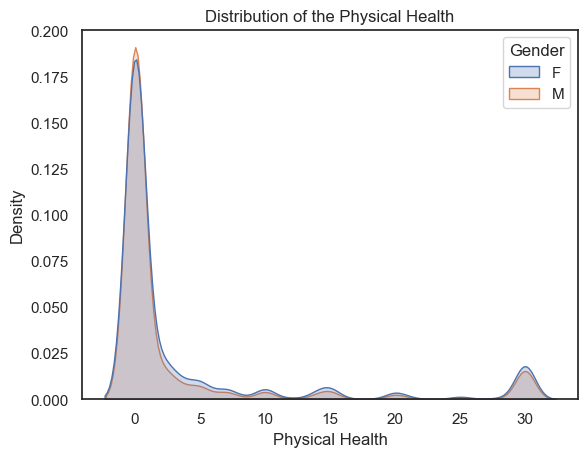

In [10]:
sns.kdeplot(data = medcenter_df, x = 'Physical Health', fill = True, hue = 'Gender')
plt.title("Distribution of the Physical Health")

We see that the distribution of our target variable is **skewed to the left**. Most of the patients seem to have a really low score of `Physical Health`.


## Heatmap of Numerical Features

<Axes: >

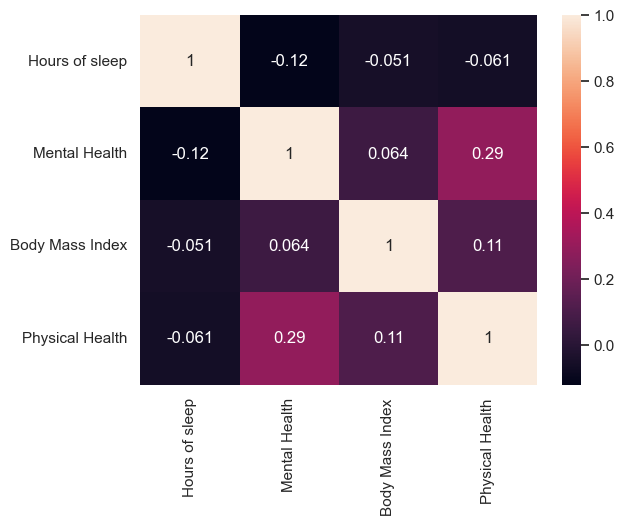

In [11]:
sns.heatmap(data = medcenter_df[numerical_features].corr(numeric_only=True), annot=True, cmap='rocket')

1. **Hours of Sleep**:

- It has a small negative correlation with Mental Health (-0.119688), indicating a slight tendency for people with fewer hours of sleep to have slightly worse mental health.
- It has a small negative correlation with Body Mass Index (-0.051189), suggesting a slight tendency for people with fewer hours of sleep to have a slightly higher BMI.
- It has a small negative correlation with Physical Health (-0.061287), implying a slight tendency for people with fewer hours of sleep to have slightly worse physical health.

2. **Mental Health**:
- It has a small negative correlation with Hours of Sleep (-0.119688), indicating a slight tendency for people with worse mental health to have fewer hours of sleep.
- It has a moderate positive correlation with Physical Health (0.289395), suggesting that better mental health is associated with better physical health.

3. **Body Mass Index**:
- It has a small positive correlation with Mental Health (0.063734), indicating a slight tendency for people with a higher BMI to have slightly better mental health.
- It has a small positive correlation with Physical Health (0.110544), suggesting that a higher BMI is associated with better physical health.

4. **Physical Health**:
- It has a small positive correlation with both Mental Health (0.289395) and Body Mass Index (0.110544), indicating that better physical health is associated with better mental health and a higher BMI to some extent.






## Comparing Categorical Variables with the Target Variable using Boxplots

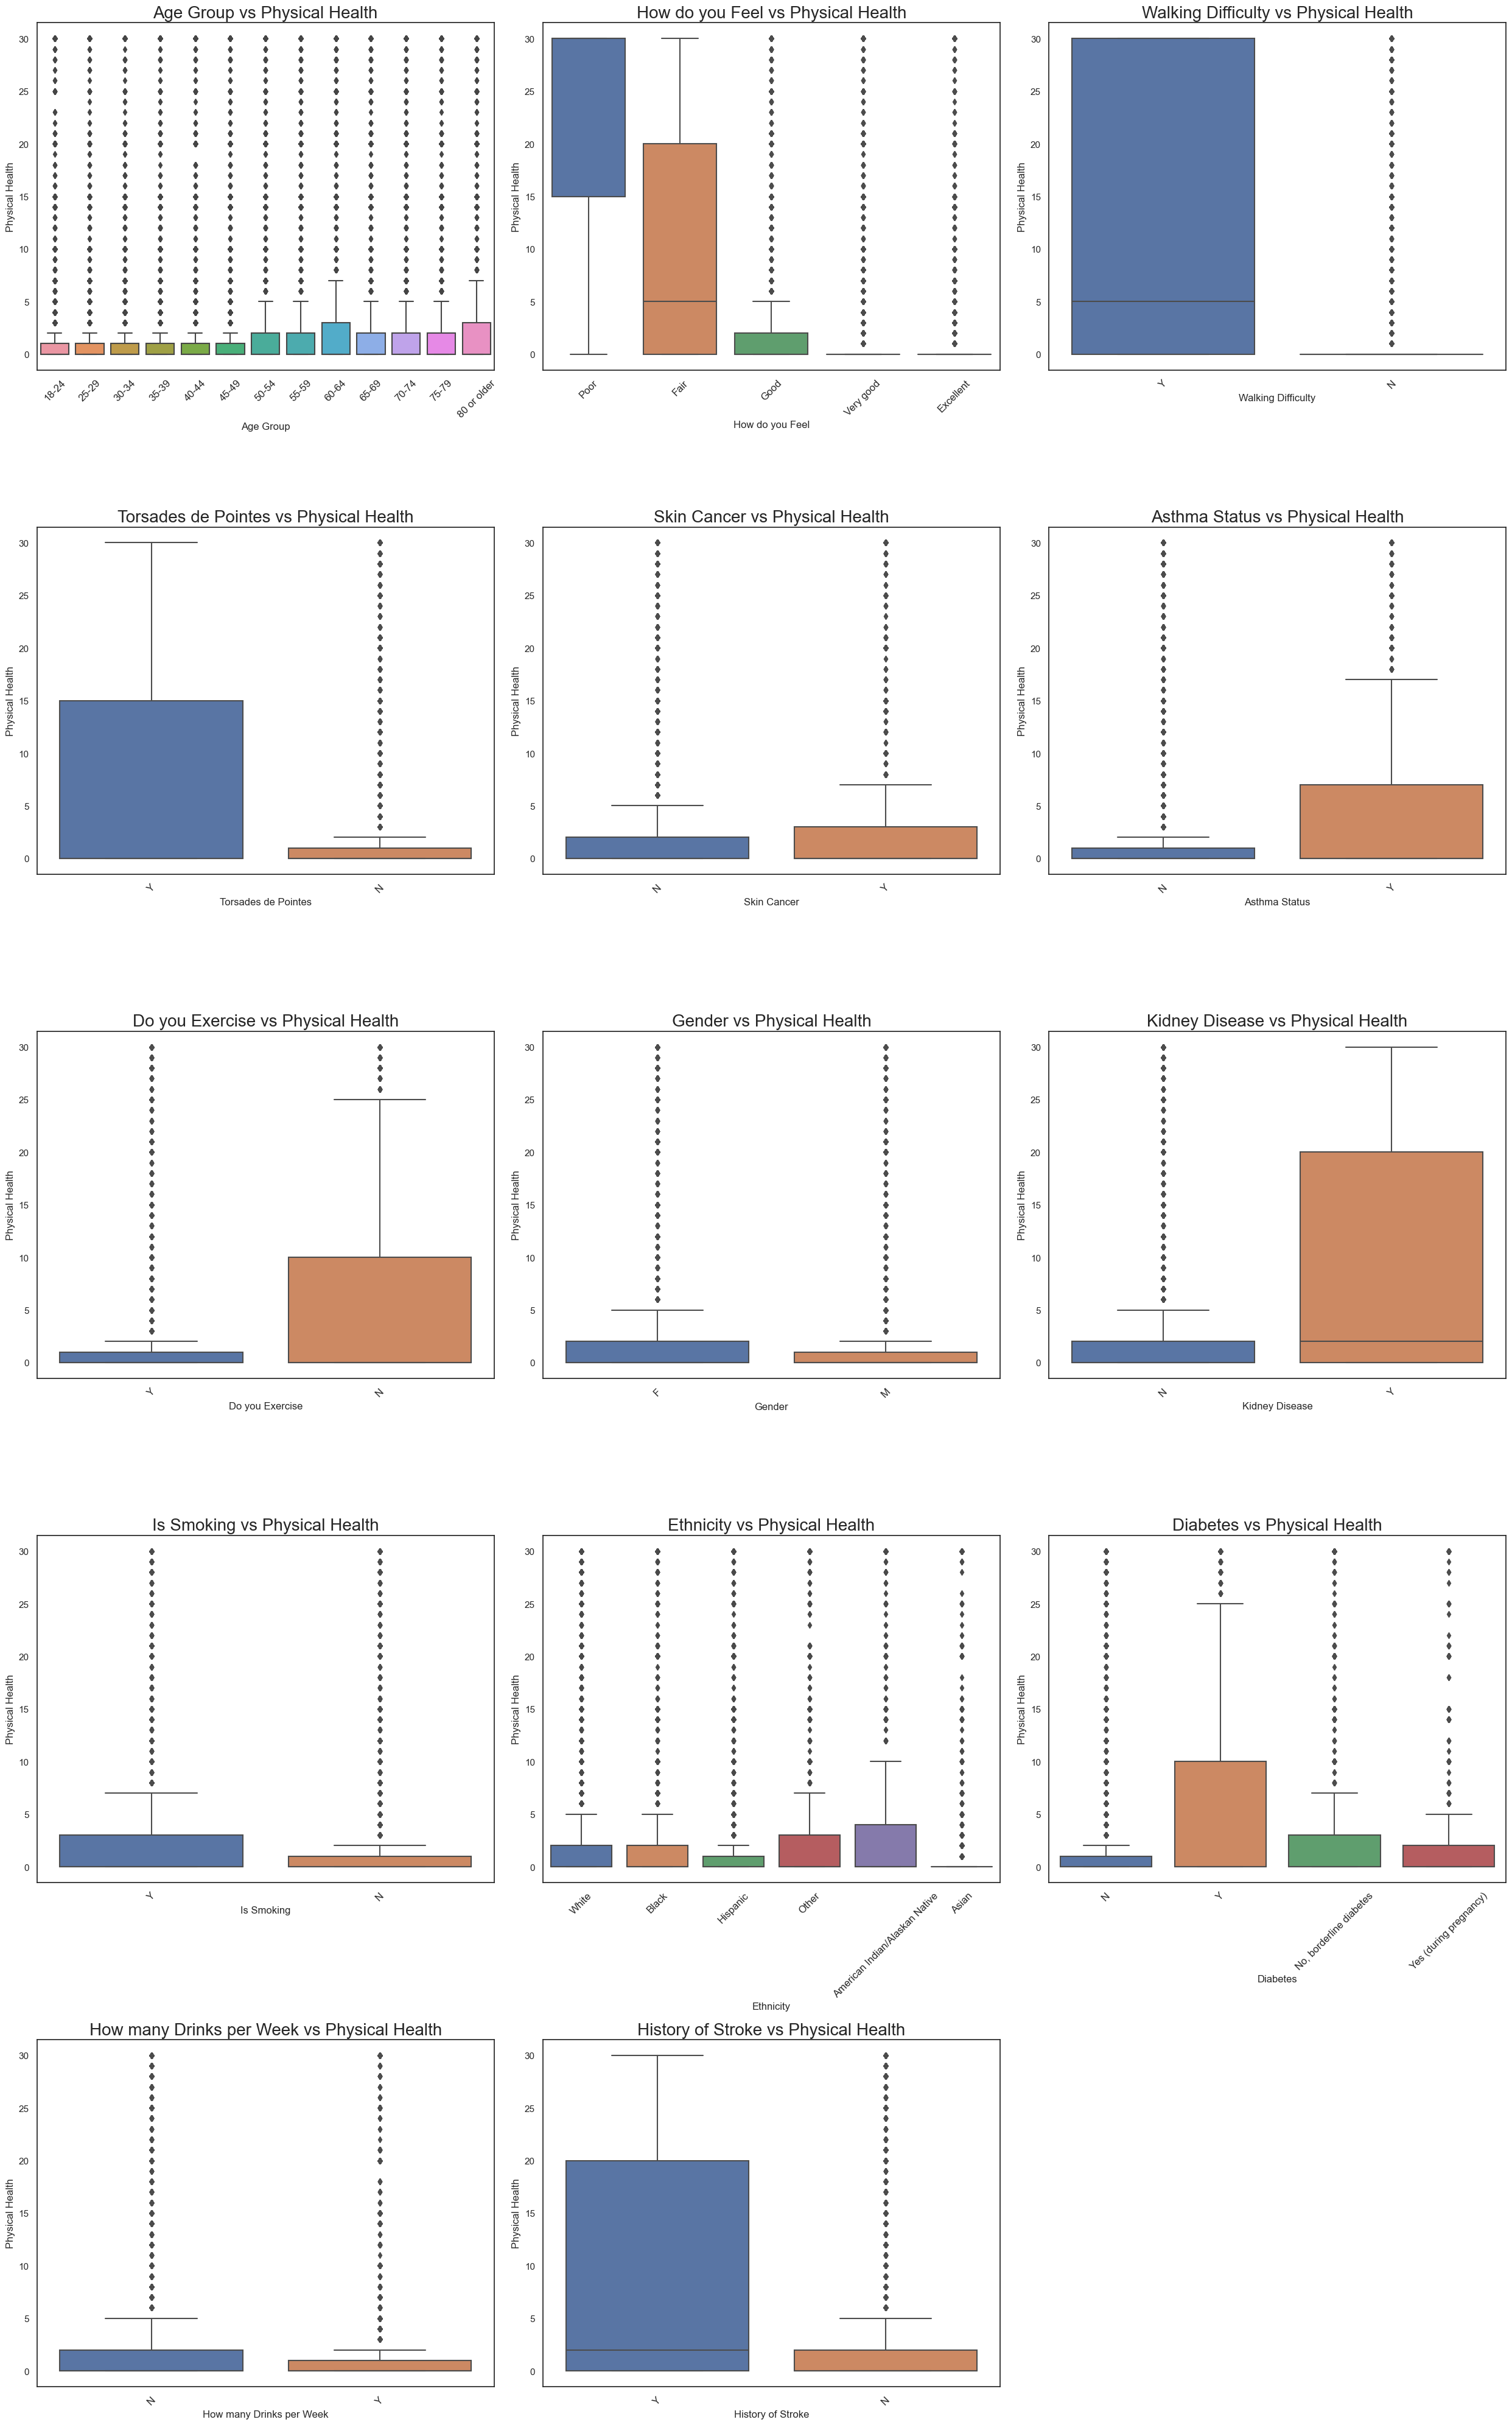

In [61]:
fig, axes = plt.subplots(5,3, figsize = (25,40))

for i in range(len(categorical_features)):
    if categorical_features[i] == 'Age Group':
        sns.boxplot(data = medcenter_df, y = 'Physical Health', x = categorical_features[i], ax = axes[i//3, i%3], order = sorted(medcenter_df['Age Group'].unique()))
    elif categorical_features[i] == 'How do you Feel':
        sns.boxplot(data = medcenter_df, y = 'Physical Health', x = categorical_features[i], ax = axes[i//3, i%3], order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'])
    else:
        sns.boxplot(data = medcenter_df, y = 'Physical Health', x = categorical_features[i], ax = axes[i//3, i%3])
        
    axes[i//3, i%3].set_title(f"{categorical_features[i]} vs Physical Health", fontsize = 20)
    axes[i//3, i%3].tick_params(axis='x', labelrotation=45, labelsize = 12)

plt.delaxes(ax = axes[4,2])
plt.tight_layout()

### Interpretation of the results 🔍: 

1. **Age group vs Physical Health**: 

    this graph does not provide any meaningful insight about some correlation between age and physical health. We see that most of the physical health scores are very low, independently from the group age, but we also have tons of outliers without a clear trend.

2. **How do you feel vs Physical Health**: 

    this graph is interesting because it appears that patients feelings are exactly the opposite of their health score. We initially assumed that a high health score meant that the patient was healthy, but from this graph we started questioning this assumption: we see that patients feeling _poor_ have a physical health score above 15, those feeling _fair_ have physical health below 20, and then those feeling _good_, _very good_ and _excellent_ have a physical health score around zero. Note that those last three categories have a huge amount of outliers and how a patient feels is not entirely reliable to assess if their health conditions are good or not. We need to investigate more to see if this feature is not relevant to our analysis, and possibly exclude it because it gives misleading indications to predict our target variable, or we might have to reconsider the meaning of the score `Physical Health` (with a high vaue indicating that the patient is ill and a low value meaning that the patient is healthy).

3. **Walking Difficulty vs Physical Health**:

    we note that those who **don't** have walking difficulty have in average a much lower physical health score, while those who do have walking difficulty span almost all the possible values of physical health, without a clear trend.

4. **Torsades de Pointes vs Physical Health**: 

    also here, in average, those who have torsades the pointes have a higher physical health score than those who aren't affected by this illness.

5. **Skin Cancer vs Physical Health**: 

    this graph is pretty balanced between those who aren't affected by skin cancer and those who do, suggesting that this feature may not be as impactful as the others with respect to our target variable. However also in this case, even if the difference is more subtle, the average physical health score of those who don't have skin cancer is lower than those who have it.




    

In [73]:
print(medcenter_df.groupby('Walking Difficulty')['Physical Health'].mean())
print()
print(medcenter_df.groupby('How do you Feel')['Physical Health'].mean())
print()
print(medcenter_df.groupby('Torsades de Pointes')['Physical Health'].mean())
print()
print(medcenter_df.groupby('Skin Cancer')['Physical Health'].mean())

Walking Difficulty
N     2.041294
Y    11.998777
Name: Physical Health, dtype: float64

How do you Feel
Excellent     0.713147
Fair         10.377160
Good          2.915819
Poor         23.066545
Very good     1.275238
Name: Physical Health, dtype: float64

Torsades de Pointes
N    2.967915
Y    7.808242
Name: Physical Health, dtype: float64

Skin Cancer
N    3.365712
Y    4.508669
Name: Physical Health, dtype: float64


## Distribution of Numerical Variables

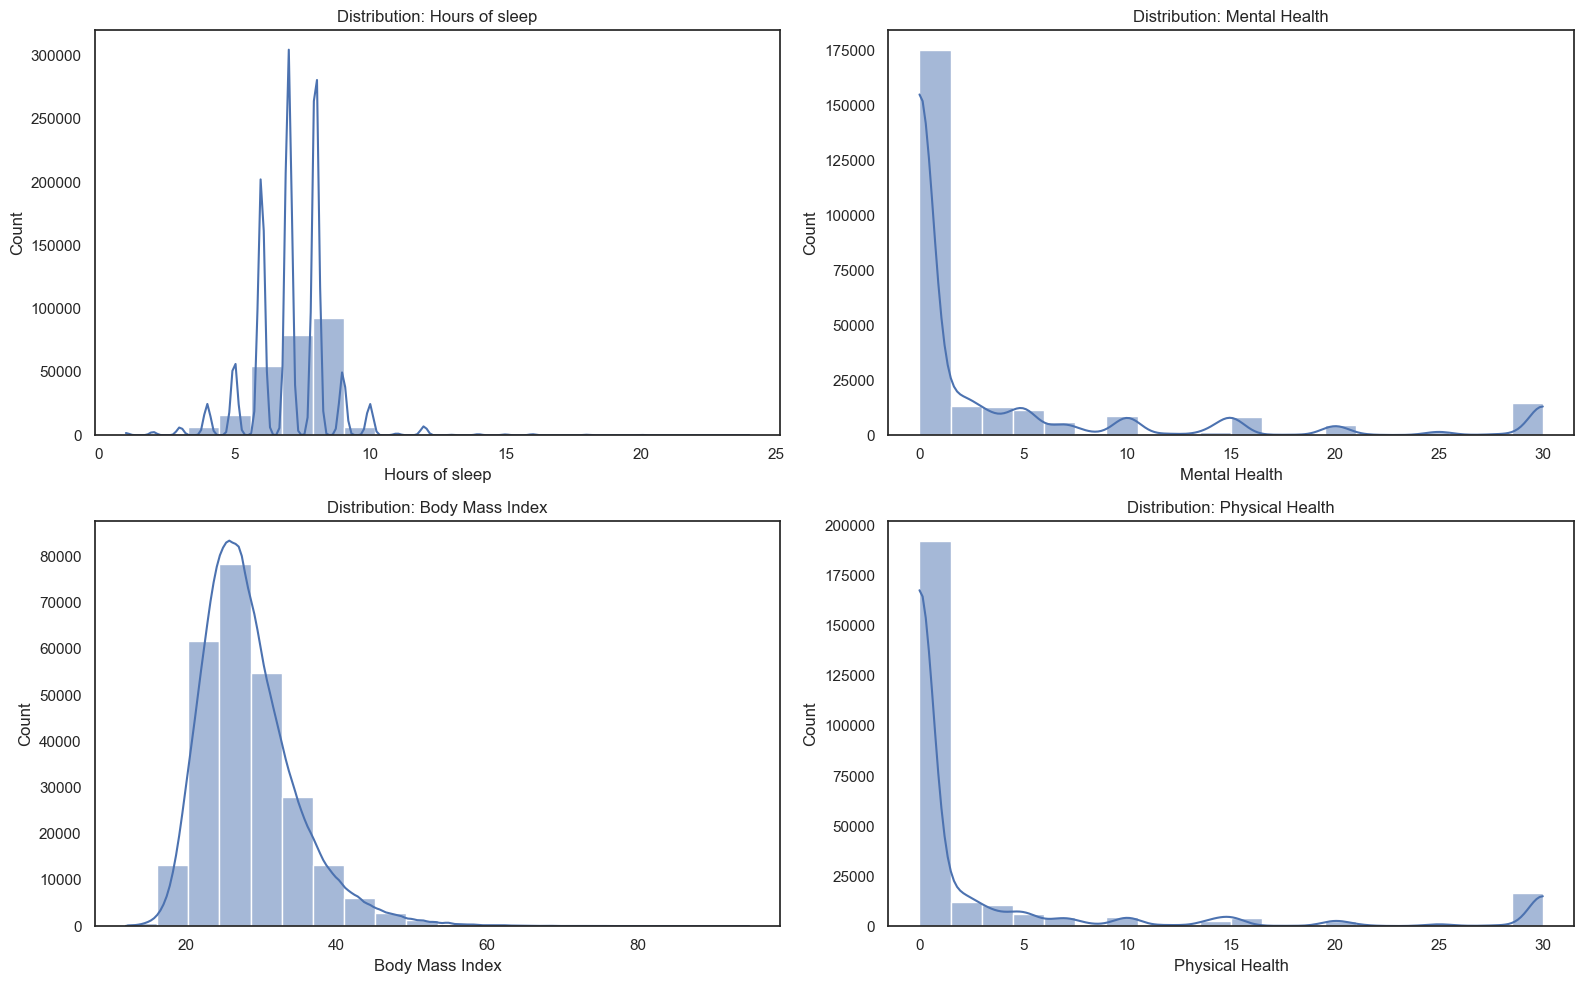

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

for i in range(len(numerical_features)):
    sns.histplot(data=medcenter_df[numerical_features[i]], ax=axes[i//2, i%2], kde=True, palette='Blues', bins=20)
    title = "Distribution: " + numerical_features[i]
    axes[i//2, i%2].set_title(title)

plt.tight_layout()

## Other important Distributions

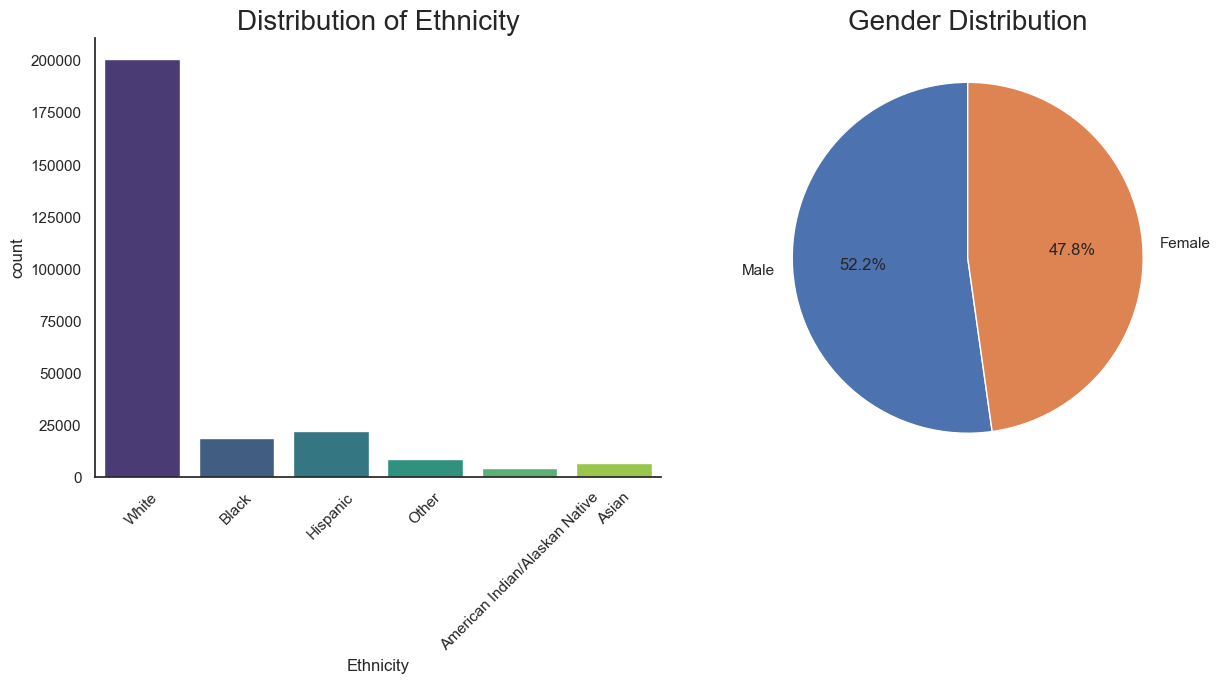

In [108]:
fig, axes = plt.subplots(1,2, figsize = (13,7))

sns.countplot(data = medcenter_df, x = 'Ethnicity', palette = 'viridis', ax = axes[0])
axes[0].tick_params(axis='x', labelrotation=45)
axes[0].set_title("Distribution of Ethnicity", fontsize = 20)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

plt.title("Gender Distribution", fontsize = 20)
plt.pie(medcenter_df['Gender'].value_counts(), autopct='%1.1f%%', labels=['Male', 'Female'], startangle = 90)
plt.tight_layout()
